#  Neural Network Linear Regression: Simple approach

This Jupyter Notebook trains a very simple neural network model to perform Linear Regression. We will use the NESA Course Specifications Linear Regression dataset, which students are already familiar with so, they can focus on understanding the TensorFlow OOP Neural Network implementation.

#### Course Specifications

<figure>
    <center><img src="images\NN_Course-Specs.png" alt="Course Specs Neural Network image" width="500" />
    <figcaption><p><em>Source: Page 29 of the Software Engineering Course Specifications</em></p>
    </figcaption></center>
</figure>

Neural networks were designed to mimic the processing inside the human brain. They consist of a series of interconnected nodes (artificial neurones). Each neurone can accept a binary input signal and potentially output another signal to connected nodes.

In the diagram, signal strength between nodes with the strongest weightings are thicker representing a higher priority in determining the final output. The 'Bias' and 'Weightings' are learnt during the training cycle and used for predictions in the execution cycle.

#### Step 1 - Import Dependencies

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error 

print(tf.__version__)

2.19.0


#### Step 2: Import The Data
We will extended the dataset, to allow for test/training splitting.

In [12]:
#Import data as a numPy array
# Training features
X_feature = np.array([[2], [4], [6], [8], [10], [12], [14], [16], [18], [20], [22], [24], [26]])

# Target variable
y_target = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])


#### Step 3: Split The Data into Training And Testing Sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3)

#### Step 4: Visualise The Data

Text(0, 0.5, 'y')

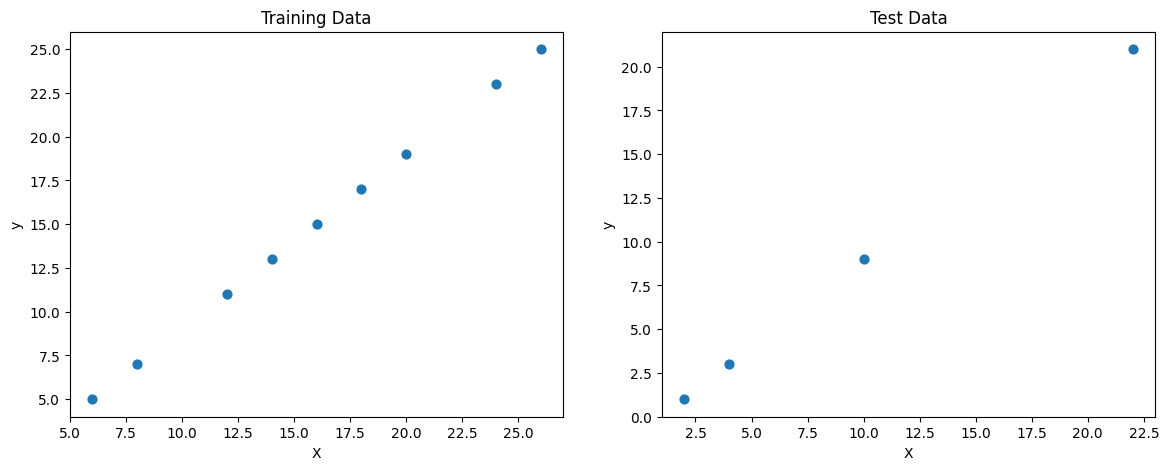

In [14]:
# Plot the training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train, y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")


axs[1].scatter(X_test, y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [15]:
tf.random.uniform([1], seed=1)

model = Sequential([
    Input(shape=(1,)),  # Input layer with 1 feature
    Dense(1)            # Output layer with 1 neuron for regression
])

#### About this model

The above code will instantiate a model (lines 1-4) that has an input layer (line 2) that in this case will have 1 neurons and take in an array of features. Because of the simple nature of the data the model does not have any hidden layers. The data will be forward chained and backward chained through in training cycles (see epochs below). The model then has 1 output layer with 1 neuron (line 4) that will output a regression value. 

Note: The output layer should have 2 neurons for binary classification or $n$ neurons for the $n$ classes in multiclass classification.

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `X_train` and `y_train` arrays.
2. The model learns to associate features and targets.
3. You ask the model to make predictions about a test set—in this example, the `X_test`.
4. Verify that the predictions match the targets from the `y_ array` array.


In [17]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=1, validation_split=0.2)

Epoch 1/200


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 101.8762 - mae: 9.3676 - val_loss: 153.4311 - val_mae: 12.3686
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 161.6339 - mae: 11.7795 - val_loss: 150.7368 - val_mae: 12.2596
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104.5980 - mae: 9.2101 - val_loss: 148.3246 - val_mae: 12.1611
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.3680 - mae: 11.0427 - val_loss: 145.7772 - val_mae: 12.0562
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153.6653 - mae: 11.0724 - val_loss: 143.2849 - val_mae: 11.9527
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 174.0169 - mae: 12.2362 - val_loss: 140.9256 - val_mae: 11.8539
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 139.4156 - mae: 11.0781 - val_loss: 138.5752 - val_mae: 11.7546
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 150.3949 - mae: 11.5075 - val_loss: 136.2446 - val_mae: 11.6554
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

#### Training Cycle 

Each $Epoch$ is a single training cycle of the neural network. Internal weightings and threshold values for each neuron are determined in the initial training cycle for each neural network. The system is exposed to a series of inputs with known responses. Linear regression with backward chaining is used to iteratively determine the set of unique values required for output. Regular
exposure to the training cycle results in improved accuracy and pattern matching.

### Step 8: Execution Cycle (Make predictions)

The execution cycle follows the training cycle and utilises the internal values developed during the training cycle to determine the output. With the model trained, you can use it to make predictions about new features.

In [18]:
#Predict the target for a new data point
new_y = np.array([4])

new_y = model.predict(new_y)
print(f"New feature is:\n{new_y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
New feature is:
[[3.3934662]]


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


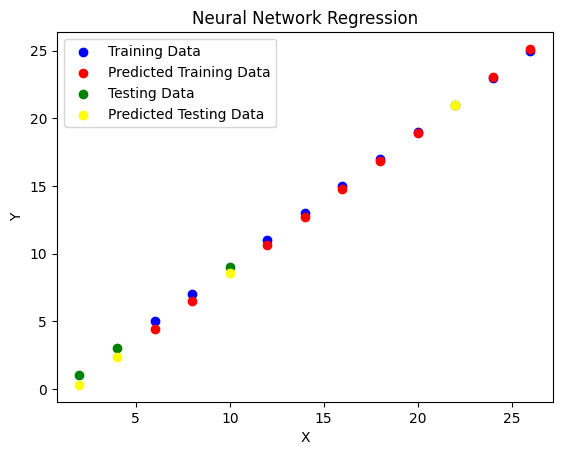

In [19]:
# Plot the actual data and model predictions
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_train, model.predict(y_train), label='Predicted Training Data', color='red')
plt.scatter(X_test, y_test, label='Testing Data', color='green')
plt.scatter(X_test, model.predict(y_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [20]:
#Get Evalutative Data from the model
model_eval = model.evaluate(X_test, y_test)
print(f"Model Evalutation: {model_eval}")
mae = mean_absolute_error(y_true=y_train,y_pred=model.predict(y_train)) 
mse = mean_squared_error(y_true=y_train,y_pred=model.predict(y_train))
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Manually calculate the loss and cost of the model
predictions = model.predict(y_train).flatten()
model_loss = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': abs(y_train - predictions)
})
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])
print(f"The cost or average loss of this model is {model_cost:.5f}")
print(model_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.4164 - mae: 0.5853
Model Evalutation: [0.4164242148399353, 0.5852709412574768]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.26334109902381897
MSE: 0.09942284226417542

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The cost or average loss of this model is 0.02926
   Target  Predicted result      Loss
0      13         12.707329  0.292671
1       7          6.498087  0.501913
2      19         18.916569  0.083431
3      23         23.056065  0.056065
4       5          4.428340  0.571660
5      25         25.125811  0.125811
6      11         10.637582  0.362418
7      15         14.777076  0.222924
8      17         16.846823  0.153177
